# Cracked Stress Analysis - Rectangular Section

## Import modules

In [1]:
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandProfile,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.prestressed_section import PrestressedSection

## Create materials

In [2]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

strand = SteelStrand(
    name="1830 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandProfile(
        yield_strength=1500,
        elastic_modulus=200e3,
        fracture_strain=0.035,
        breaking_strength=1830,
    ),
    colour="slategrey",
    prestress_force=900e3,
)

## Create geometry

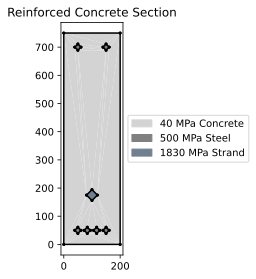

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [3]:
geom = rectangular_section(d=750, b=200, material=concrete)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=2, x_s=100, anchor=(50, 700)
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=4, x_s=100 / 3, anchor=(50, 50)
)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=750,
    material=strand,
    x=100,
    y=750 - 575,
)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

## Cracked analysis

In [4]:
m_ext = 400e6  # apply 400 kN.m moment
cr = conc_sec.calculate_cracked_properties(m_ext=m_ext)

## Cracking moment

In [5]:
print(f"M_cr = {cr.m_cr/1e6:.2f} kN.m")

M_cr = 377.25 kN.m


## Confirm elastic stresses at cracking moment

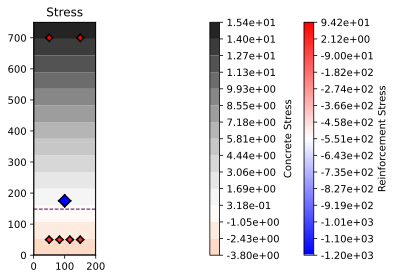

<AxesSubplot:title={'center':'Stress'}>

In [11]:
res = conc_sec.calculate_uncracked_stress(m=cr.m_cr)
res.plot_stress()

## Visualise cracked stresses

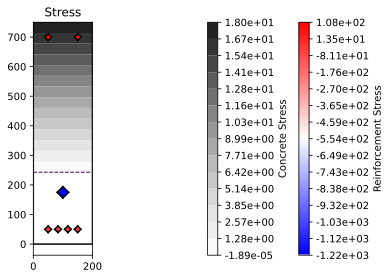

<AxesSubplot:title={'center':'Stress'}>

In [12]:
res = conc_sec.calculate_cracked_stress(cracked_results=cr)
res.plot_stress()

## Compare with textbook
![](img/rect_crack.jpg)

## Confirm cracked neutral axis depth

In [14]:
print(f"d_nc = {cr.d_nc:.2f} mm")

d_nc = 507.02 mm


## Print bar and strand stresses

In [15]:
from rich.pretty import pprint

pprint(res.lumped_reinforcement_stresses)
pprint(res.strand_stresses)

[
│   108.06201359597534,
│   108.0620135959754,
│   -45.62971756884201,
│   -45.62971756884198,
│   -45.62971756884197,
│   -45.62971756884194
]

[-1216.0735820877183]